In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Conexión a un archivo CSV preprocesado perteneciente a la DB MIMIC-III
# Lectura del archivo CSV en un DataFrame de Pandas
df = pd.read_csv(r'C:\Users\rocio\OneDrive\Escritorio\Cuidados_Intensivos\Modelos_Machine_Learning\Modelo2_Prediccion_Mortalidad\modelo2.csv', low_memory=False)

In [72]:
df

,subject_id,fecha,Arterial BP [Systolic],Arterial Blood Pressure mean,Arterial Blood Pressure systolic,Bicarbonate,"Bilirubin, Total",Creatinine,GCS Total,Heart Rate,...,admittime,deathtime,admission_type,ethnicity,diagnosis,hospital_expire_flag,gender,dob,dod,icd9_code
0,10006,2164-09-24,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,...,2164-10-23 21:09:00,NaN,EMERGENCY,BLACK/AFRICAN AMERICAN,SEPSIS,0,F,2094-03-05 00:00:00,2165-08-12 00:00:00,99591
1,10006,2164-09-24,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,...,2164-10-23 21:09:00,NaN,EMERGENCY,BLACK/AFRICAN AMERICAN,SEPSIS,0,F,2094-03-05 00:00:00,2165-08-12 00:00:00,99662
2,10006,2164-09-24,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,...,2164-10-23 21:09:00,NaN,EMERGENCY,BLACK/AFRICAN AMERICAN,SEPSIS,0,F,2094-03-05 00:00:00,2165-08-12 00:00:00,5672
3,10006,2164-09-24,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,...,2164-10-23 21:09:00,NaN,EMERGENCY,BLACK/AFRICAN AMERICAN,SEPSIS,0,F,2094-03-05 00:00:00,2165-08-12 00:00:00,40391
4,10006,2164-09-24,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,...,2164-10-23 21:09:00,NaN,EMERGENCY,BLACK/AFRICAN AMERICAN,SEPSIS,0,F,2094-03-05 00:00:00,2165-08-12 00:00:00,42731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497892,44228,2170-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2170-12-15 03:14:00,NaN,EMERGENCY,WHITE,CHOLANGITIS,0,F,2112-10-22 00:00:00,2171-04-14 00:00:00,1975
497893,44228,2170-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2170-12-15 03:14:00,NaN,EMERGENCY,WHITE,CHOLANGITIS,0,F,2112-10-22 00:00:00,2171-04-14 00:00:00,45182
497894,44228,2170-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2170-12-15 03:14:00,NaN,EMERGENCY,WHITE,CHOLANGITIS,0,F,2112-10-22 00:00:00,2171-04-14 00:00:00,99592
497895,44228,2170-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2170-12-15 03:14:00,NaN,EMERGENCY,WHITE,CHOLANGITIS,0,F,2112-10-22 00:00:00,2171-04-14 00:00:00,2449


In [73]:
# eliminar las columnas 'B' y 'C'
df = df.drop(['fecha', 'Arterial Blood Pressure systolic', 'Vancomycin/Random', 'Bicarbonate', 'deathtime', 'admission_type', 'dob', 'dod', 'hospital_expire_flag', 'diagnosis' ], axis=1)

In [74]:
df.head()

,subject_id,Arterial BP [Systolic],Arterial Blood Pressure mean,"Bilirubin, Total",Creatinine,GCS Total,Heart Rate,Platelet Count,"Potassium, Whole Blood",Respiratory Rate,"Sodium, Whole Blood",Temperature Fahrenheit,Urea Nitrogen,WBC Count,pO2,admittime,ethnicity,gender,icd9_code
0,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591
1,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99662
2,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,5672
3,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,40391
4,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,42731


In [75]:
# Renombra las columnas del DataFrame
df = df.rename(columns={
    'subject_id': 'paciente',
    'fecha': 'fecha',
    'Arterial BP [Systolic]': 'PAS',
    'Arterial Blood Pressure mean': 'PAM',
    'Arterial Blood Pressure systolic': 'sistolica',
    'Bicarbonate': 'bicarbonato',
    'Bilirubin, Total': 'bilirrubina',
    'Creatinine': 'creatinina',
    'GCS Total': 'GCS',
    'Heart Rate': 'ritmo_cardiaco',
    'Platelet Count': 'plaquetas',
    'Potassium, Whole Blood': 'potasio',
    'Whole Blood': 'sangre_total',
    'Respiratory Rate': 'ritmo_respiratorio',
    'Sodium, Whole Blood': 'sodio',
    'Temperature Fahrenheit': 'temperatura_F',
    'Urea Nitrogen': 'urea',
    'Vancomycin/Random': 'vancomicina',
    'WBC Count': 'glucemia',
    'pO2': 'pO2',
    'admittime': 'hora_admision',
    'deathtime': 'hora_muerte',
    'admission_type': 'tipo_admision',
    'ethnicity': 'etnia',
    'diagnosis': 'diagnostico',
    'hospital_expire_flag': 'muerte_en_uci',
    'gender': 'genero',
    'dob': 'fecha_nacimiento',
    'dod': 'fecha_muerte',
    'icd9_code': 'icd9_code'
})

In [76]:
df

,paciente,PAS,PAM,bilirrubina,creatinina,GCS,ritmo_cardiaco,plaquetas,potasio,ritmo_respiratorio,sodio,temperatura_F,urea,glucemia,pO2,hora_admision,etnia,genero,icd9_code
0,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591
1,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99662
2,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,5672
3,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,40391
4,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,42731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497892,44228,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170-12-15 03:14:00,WHITE,F,1975
497893,44228,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170-12-15 03:14:00,WHITE,F,45182
497894,44228,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170-12-15 03:14:00,WHITE,F,99592
497895,44228,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170-12-15 03:14:00,WHITE,F,2449


In [77]:
df

,paciente,PAS,PAM,bilirrubina,creatinina,GCS,ritmo_cardiaco,plaquetas,potasio,ritmo_respiratorio,sodio,temperatura_F,urea,glucemia,pO2,hora_admision,etnia,genero,icd9_code
0,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591
1,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99662
2,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,5672
3,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,40391
4,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,42731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497892,44228,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170-12-15 03:14:00,WHITE,F,1975
497893,44228,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170-12-15 03:14:00,WHITE,F,45182
497894,44228,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170-12-15 03:14:00,WHITE,F,99592
497895,44228,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2170-12-15 03:14:00,WHITE,F,2449


In [78]:
# Exportar DataFrame a un archivo CSV
df.to_csv('df_esp.csv', index=False)


C:\Users\rocio\AppData\Local\Temp\ipykernel_17764\2399286646.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicity_counts.index, rotation=45, ha='right')


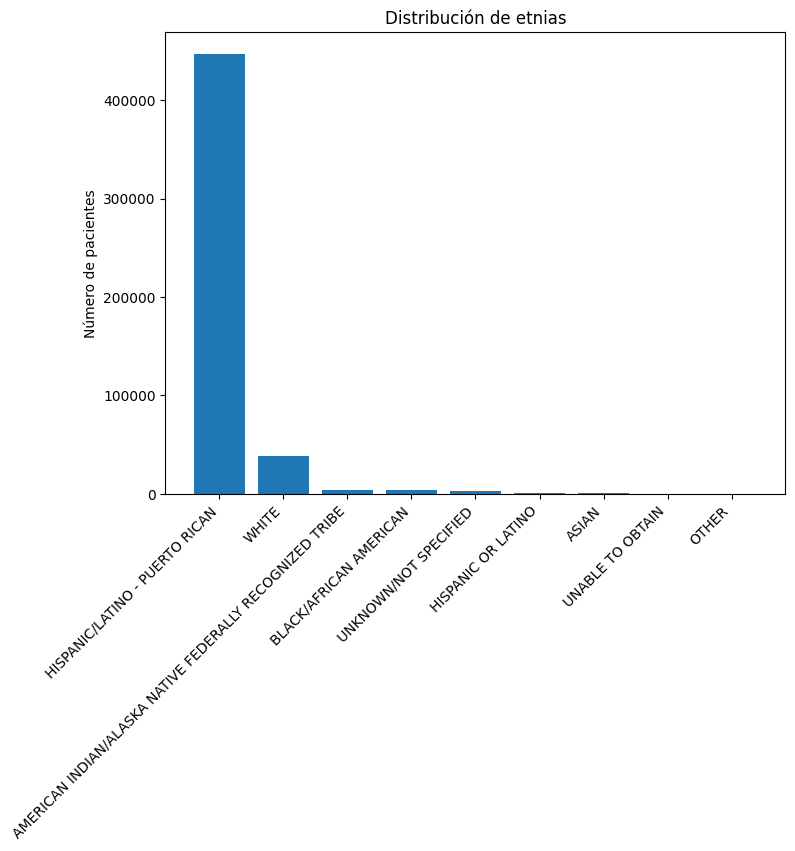

In [79]:
# Calcular conteo de pacientes por etnia
ethnicity_counts = df['etnia'].value_counts()

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(ethnicity_counts.index, ethnicity_counts.values)

# Configurar etiquetas y título del gráfico
ax.set_xticklabels(ethnicity_counts.index, rotation=45, ha='right')
ax.set_ylabel('Número de pacientes')
ax.set_title('Distribución de etnias')

# Mostrar el gráfico
plt.show()



C:\Users\rocio\AppData\Local\Temp\ipykernel_17764\4140664778.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(gender_counts.index)


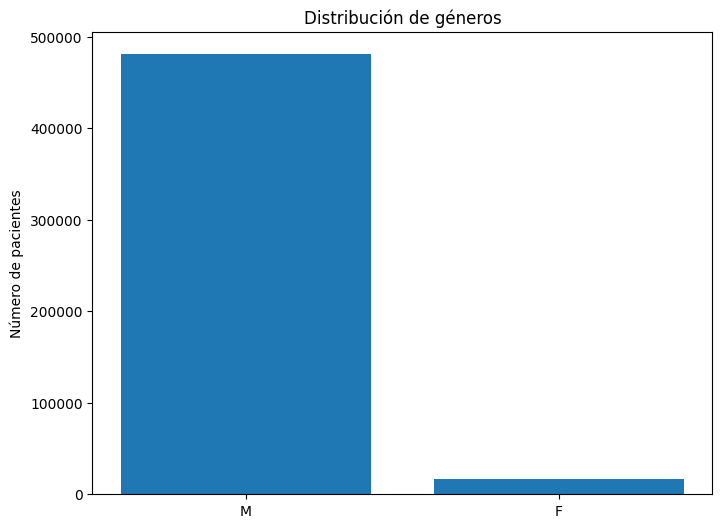

In [80]:
# Calcular conteo de pacientes por género
gender_counts = df['genero'].value_counts()

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(gender_counts.index, gender_counts.values)

# Configurar etiquetas y título del gráfico
ax.set_xticklabels(gender_counts.index)
ax.set_ylabel('Número de pacientes')
ax.set_title('Distribución de géneros')

# Mostrar el gráfico
plt.show()


In [ ]:
# Calcular conteo de muertes en la UCI
death_counts = df['muerte_en_uci'].value_counts()

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(death_counts.index, death_counts.values)

# Configurar etiquetas y título del gráfico
ax.set_xticklabels(['Supervivencia', 'Muerte'])
ax.set_ylabel('Número de pacientes')
ax.set_title('Cantidad de muertes en la UCI')

# Mostrar el gráfico
plt.show()


In [ ]:
# Calcular conteo de diagnósticos
diagnosis_counts = df['diagnostico'].value_counts().head(10)

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(diagnosis_counts.index, diagnosis_counts.values)

# Configurar etiquetas y título del gráfico
ax.set_xticklabels(diagnosis_counts.index, rotation=90)
ax.set_ylabel('Número de pacientes')
ax.set_title('Los 10 diagnósticos más comunes')

# Mostrar el gráfico
plt.show()



Analizando el tipo de diagnostico que mas muertes recibe la uci:

sepsis: sepsis (enfermedad infecciosa grave que puede causar fallo de múltiples órganos)

pneumonia: neumonía (infección del tejido pulmonar)

fever: fiebre (aumento de la temperatura corporal)

respiratory distress: dificultad respiratoria (problema para respirar)

uti/pyelonephritis: infección del tracto urinario/pionefrosis (infección renal)

hypotension;unresponsive: hipotensión (presión arterial baja); sin respuesta (al tratamiento)

urinary tract infection;pyelonephritis: infección del tracto urinario/pionefrosis (infección renal)

aromegly;burkitts lymphoma: acromegalia (aumento anormal de la hormona del crecimiento); linfoma de Burkitt (cáncer del sistema 
linfático)

facil numbness: entumecimiento facial (pérdida de sensibilidad en la cara)

___________________________________________________________________________________________

El índice de comorbilidad de Charlson es un instrumento que predice las complicaciones de la suma de ciertas enfermedades, como la capacidad funcional al alta y la mortalidad

 índice de Charlson <3 se asoció a mortalidad 10-14% pero con un índice >3 la proporción aumentó a 28%

![Evaluación del modelo](\indice-charlson.jpg)

Crea una lista con las condiciones médicas y sus correspondientes puntuaciones según la tabla anterior.

In [82]:

# Cargar las tablas como DataFrames
df3 = pd.read_csv(r'C:\Users\rocio\OneDrive\Escritorio\Cuidados_Intensivos\Modelos_Machine_Learning\Modelo2_Prediccion_Mortalidad\charlson.csv')

In [83]:
df3.head()

,row_id,icd9_code,short_title,long_title,charlson_puntaje
0,1,1716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...,1
1,2,1720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec...",1
2,3,1721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter...",1
3,4,1722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter...",1
4,5,1723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc...",1


In [84]:
# Unir los dataframes por la clave única 'icd9_code'
df_merge = pd.merge(df, df3, on='icd9_code')

In [ ]:
df_merge.head()

,paciente,PAS,PAM,bilirrubina,creatinina,GCS,ritmo_cardiaco,plaquetas,potasio,ritmo_respiratorio,...,glucemia,pO2,hora_admision,etnia,genero,icd9_code,row_id,short_title,long_title,charlson_puntaje
0,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,0
1,10006,NaN,NaN,NaN,7.4,NaN,NaN,168.0,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,0
2,10006,NaN,NaN,NaN,8.3,NaN,NaN,152.0,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,0
3,10006,NaN,NaN,NaN,NaN,NaN,NaN,127.0,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,0
4,10006,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,0


In [85]:
# Exportar el DataFrame a un archivo CSV
df_merge.to_csv('df_merge.csv', index=False)

In [86]:
# eliminar las columnas 'B' y 'C'
df3 = df_merge.drop(['row_id', 'hora_admision', 'long_title','sodio', 'potasio' ], axis=1)

In [89]:
df_merge.head()

,paciente,PAS,PAM,bilirrubina,creatinina,GCS,ritmo_cardiaco,plaquetas,potasio,ritmo_respiratorio,...,glucemia,pO2,hora_admision,etnia,genero,icd9_code,row_id,short_title,long_title,charlson_puntaje
0,10006,NaN,NaN,NaN,7.0,NaN,NaN,157.0,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,1
1,10006,NaN,NaN,NaN,7.4,NaN,NaN,168.0,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,1
2,10006,NaN,NaN,NaN,8.3,NaN,NaN,152.0,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,1
3,10006,NaN,NaN,NaN,NaN,NaN,NaN,127.0,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,1
4,10006,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2164-10-23 21:09:00,BLACK/AFRICAN AMERICAN,F,99591,11403,Sepsis,Sepsis,1


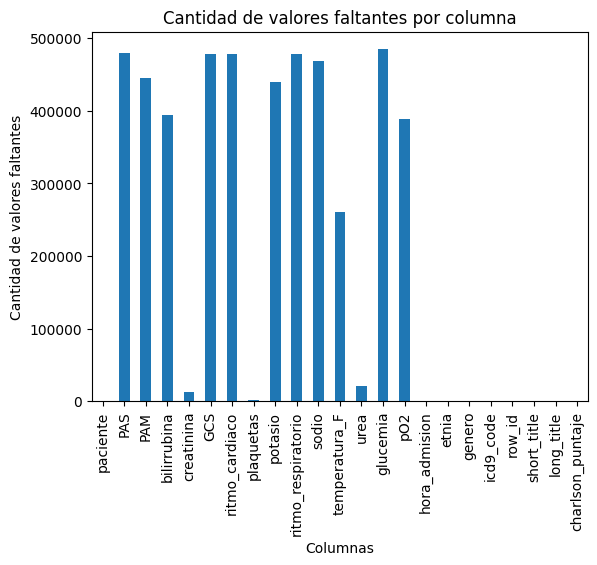

In [90]:
import matplotlib.pyplot as plt

# Calcular la cantidad de valores faltantes en cada columna
na_counts = df_merge.isna().sum()

# Crear una gráfica de barras para visualizar los valores faltantes
na_counts.plot(kind='bar')
plt.title('Cantidad de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()


In [94]:
#reemplazo nulos y nan por la media de cada columna
# Completar los valores nulos y NaN con ceros
df_merge = df_merge.fillna(0)

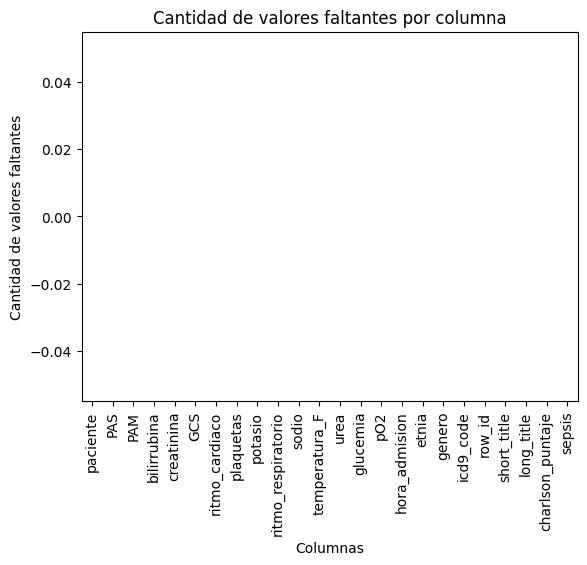

In [95]:

# Calcular la cantidad de valores faltantes en cada columna
na_counts = df_merge.isna().sum()

# Crear una gráfica de barras para visualizar los valores faltantes
na_counts.plot(kind='bar')
plt.title('Cantidad de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()

In [97]:
# Comprobar los tipos de datos de cada columna del DataFrame
print(df_merge.dtypes)

paciente                int64
PAS                   float64
PAM                   float64
bilirrubina           float64
creatinina            float64
GCS                   float64
ritmo_cardiaco        float64
plaquetas             float64
potasio               float64
ritmo_respiratorio    float64
sodio                 float64
temperatura_F         float64
urea                  float64
glucemia              float64
pO2                   float64
hora_admision          object
etnia                  object
genero                 object
icd9_code              object
row_id                  int64
short_title            object
long_title             object
charlson_puntaje        int64
sepsis                  int32
dtype: object


In [100]:
# eliminar las columnas 'B' y 'C'
df_merge = df_merge.drop(['hora_admision' ], axis=1)

In [101]:
# Comprobar los tipos de datos de cada columna del DataFrame
print(df_merge.dtypes)

paciente                int64
PAS                   float64
PAM                   float64
bilirrubina           float64
creatinina            float64
GCS                   float64
ritmo_cardiaco        float64
plaquetas             float64
potasio               float64
ritmo_respiratorio    float64
sodio                 float64
temperatura_F         float64
urea                  float64
glucemia              float64
pO2                   float64
etnia                  object
genero                 object
icd9_code              object
row_id                  int64
short_title            object
long_title             object
charlson_puntaje        int64
sepsis                  int32
dtype: object


Armo arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle

# Definir la variable objetivo 'sepsis'
df_merge['sepsis'] =  ((df_merge['ritmo_respiratorio'] > 100) & (df_merge['plaquetas'] <20) & (df_merge['bilirrubina'] > 12) & (df_merge['PAM'] < 70) & (df_merge['GCS'] < 6) & (df_merge['creatinina'] > 5) & (df_merge['pO2'] < 200) & (df_merge['charlson_puntaje'] > 3)).astype(int)     
  

# Seleccionar los signos vitales relevantes
X = df[['ritmo_cardiaco', 'plaquetas', 'bilirrubina', 'PAM', 'GCS', 'creatinina', 'pO2', 'charlson_puntaje']]
y = df['sepsis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train score: {train_score:.3f}, Test score: {test_score:.3f}')
# Guardar el modelo entrenado
with open("prediccion_mortalidad.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
# Configurar la columna "col1" como el índice del DataFrame
df_merge.set_index('charlson_puntaje', inplace=True)


In [108]:
# Verificar si la columna "charlson_puntaje" existe en el DataFrame
if 'charlson_puntaje' in df_merge.columns:
    # Hacer algo con la columna "charlson_puntaje"
    print(df['charlson_puntaje'])
else:
    # Manejar el caso en que la columna no existe
    print("La columna 'charlson_puntaje' no existe en el DataFrame")


La columna 'charlson_puntaje' no existe en el DataFrame


In [ ]:
import pandas as pd
import pickle
import gradio as gr

# Cargar el modelo desde un archivo
with open('sepsis_model_refinado.pkl', 'rb') as archivo:
    modelo = pickle.load(archivo)

def predict_sepsis(ritmo_cardiaco, plaquetas, bilirrubina, PAM, GCS, creatinina, pO2):
    """
    Esta función clasifica si un paciente morirá o no
    
    Args:
    - ritmo_cardiaco (float): Ritmo cardíaco del paciente.
    - GCS (float): Escala de Coma de Glasgow (GCS, por sus siglas en inglés) del paciente.
    - PAS (float): Presión arterial sistólica (PAS) del paciente.
    
    Returns:
    - str: Cadena que indica si el paciente tiene sepsis ('Sí') o no ('No').
    """
    # Crear un DataFrame con los valores de los signos vitales
    data = pd.DataFrame({"ritmo_cardiaco": [ritmo_cardiaco],
                         "plaquetas":[plaquetas],
                         "bilirrubina":[bilirrubina],
                         "PAM":[PAM],
                         "GCS": [GCS],
                         "creatinina":[creatinina],
                         "pO2": [pO2]})
    
    # Hacer la predicción de sepsis
    pred = modelo.predict(data)[0]
    
    # Retornar la cadena correspondiente
    if pred == 0:
        return "Negativo"
    else:
        return "Positivo"

# Crear la interfaz de Gradio
inputs = [gr.inputs.Number(label="ritmo_cardiaco"),
          gr.inputs.Number(label="plaquetas"),
          gr.inputs.Number(label="bilirrubina"),
          gr.inputs.Number(label="PAM"),
          gr.inputs.Number(label="GCS"),
          gr.inputs.Number(label="creatinina"),
          gr.inputs.Number(label="pO2")]


output = gr.outputs.Textbox(label="Sepsis")

gr.Interface(fn=predict_sepsis, inputs=inputs, outputs=output).launch()